In [1]:
import numpy as np
from pathlib import Path
path = Path("../daily-historical-stock-prices-1970-2018/historical_stock_prices_light.csv")

In [2]:
from inference.prepare import StockData

stockData = StockData()

In [3]:
array, tickers, dates = stockData.get_N_stocks(10)
print("Shape of the output array is: {}".format(array.shape))
print("Number of stocks observed is: {}".format(len(tickers)))
print("Number of observations is: {}".format(len(dates)))
print(array[:5])

Shape of the output array is: (12269, 10)
Number of stocks observed is: 10
Number of observations is: 12269
[[30.125       0.92592591  3.54166675  9.4375     18.22500038  9.15310669
   1.25        0.85677081  1.234375    1.9296875 ]
 [30.625       1.00823045  3.45833325  9.5625     18.29999924  9.58456612
   1.21875     0.85416669  1.2578125   1.9375    ]
 [31.          1.02469134  3.44791675  9.46875    18.41250038  9.76947689
   1.18923616  0.84375     1.25390625  1.96875   ]
 [30.75        1.02880657  3.33333325  9.4375     18.42499924  9.64620304
   1.21180558  0.8515625   1.25        1.96484375]
 [30.75        1.03292179  3.26041675  9.3125     18.4375      9.49211025
   1.20659721  0.85677081  1.234375    1.953125  ]]


In [4]:
from inference.sample import StockSampler

m=4

sampler = StockSampler(array, tickers, dates, m=m)

In [5]:
sampler.x

array([[ 30.125     ,   0.92592591,   3.54166675, ...,   0.85677081,
          1.234375  ,   1.9296875 ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [ 71.27999878, 348.76998901, 137.82000732, ...,  45.65000153,
        132.61000061,  79.51999664]])

In [6]:
sampler.sample(100)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [02:21<00:00,  1.41s/it]


In [7]:
from inference.analyse import StockAnalysis

params = {"theta": sampler.theta, "b2":sampler.b2}

analyser = StockAnalysis(sampler.prices_array, sampler.etas + sampler.Rs,
                        sampler.tickers, params, dates=sampler.dates, m=m)

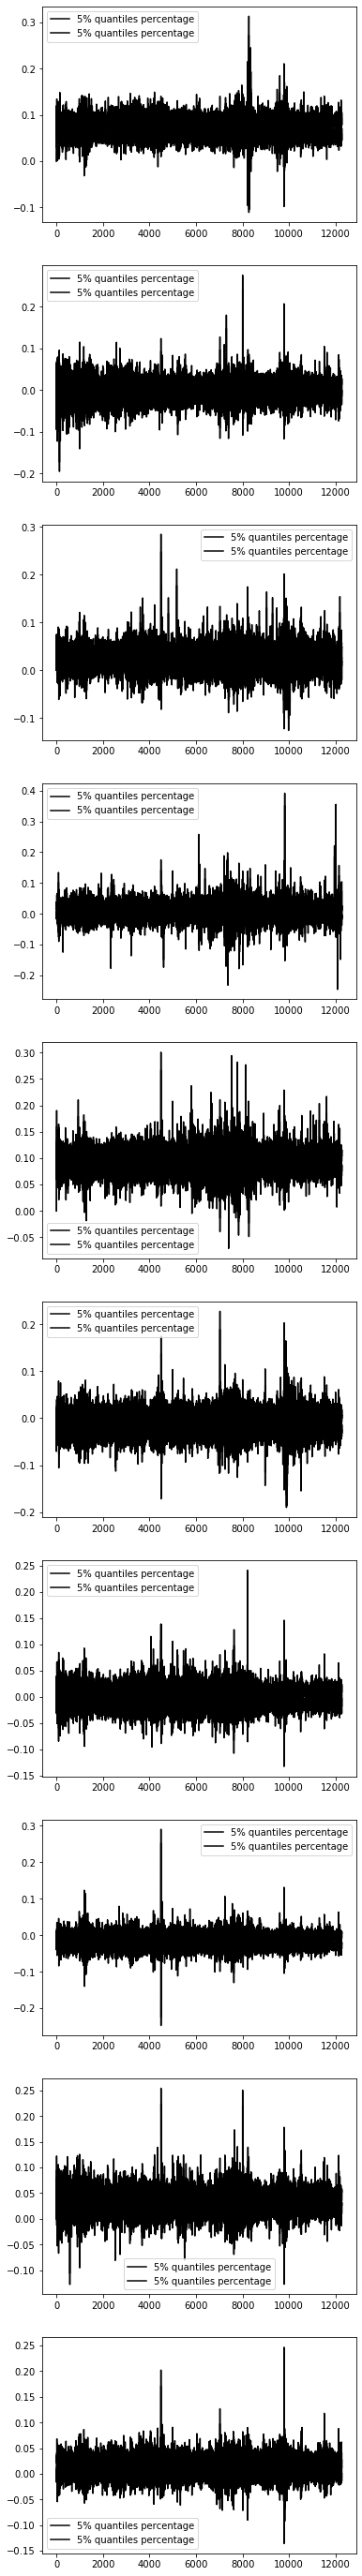

In [13]:
analyser.plot_quantiles_percentage()

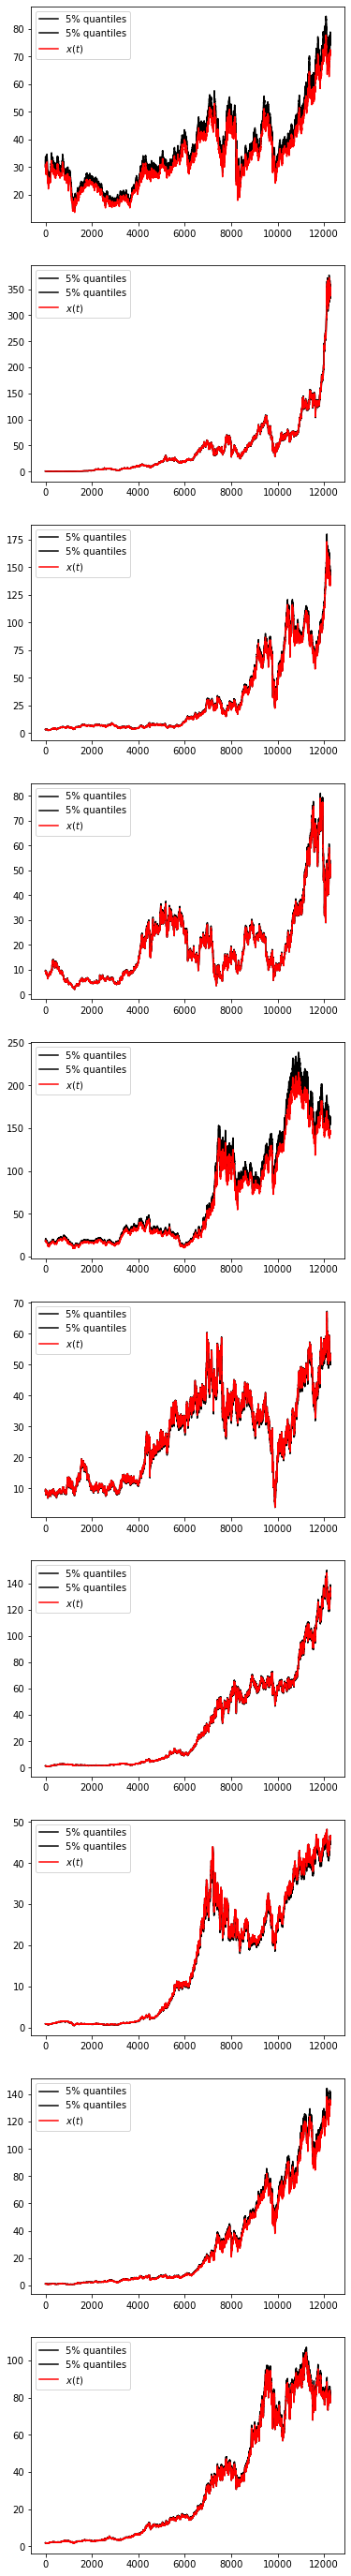

In [8]:
analyser.plot_quantiles()

In [9]:
index_list = [1,2,3,5,6,7,8,9]
observed_tickers = [sampler.tickers[i] for i in index_list]

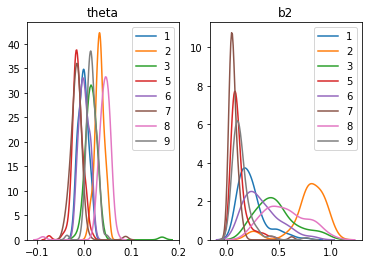

In [10]:
analyser.plot_parameter_distributions(observed_tickers)

In [11]:
sampler.tickers

['AEP', 'BA', 'CAT', 'FL', 'IBM', 'IP', 'JNJ', 'KO', 'UTX', 'XOM']

In [12]:
sampler.b2

array([[0.41772686, 0.22795001, 0.25900077, 0.309518  , 0.24209716,
        0.45571712, 0.47994393, 0.62581017, 0.25287854, 0.76487483],
       [0.41772686, 0.21253243, 0.25900077, 0.33430624, 0.24209716,
        0.26537046, 0.34530765, 0.05939878, 0.31470088, 0.0912874 ],
       [0.41772686, 0.09173192, 0.25900077, 0.66336206, 0.24209716,
        0.10201884, 0.4306095 , 0.12395389, 0.58257489, 0.07772746],
       [0.41772686, 0.26716543, 0.25900077, 0.66567132, 0.24209716,
        0.06836942, 0.26451219, 0.06655496, 0.40004862, 0.29387029],
       [0.41772686, 0.10851641, 0.25900077, 0.24206531, 0.24209716,
        0.1405493 , 0.13722388, 0.0383603 , 0.57189576, 0.10544841],
       [0.41772686, 0.35122918, 0.25900077, 0.34302249, 0.24209716,
        0.11190858, 0.56084699, 0.05427749, 0.5858157 , 0.06315449],
       [0.41772686, 0.15938537, 0.25900077, 0.50486179, 0.24209716,
        0.09112148, 0.38330945, 0.07926065, 0.86019047, 0.10978415],
       [0.41772686, 0.35559495, 0.2590007